Saving IBM_analysis.csv to IBM_analysis (2).csv


<ipython-input-5-95f9ea9f7cbf>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_data.fillna(employee_data.median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


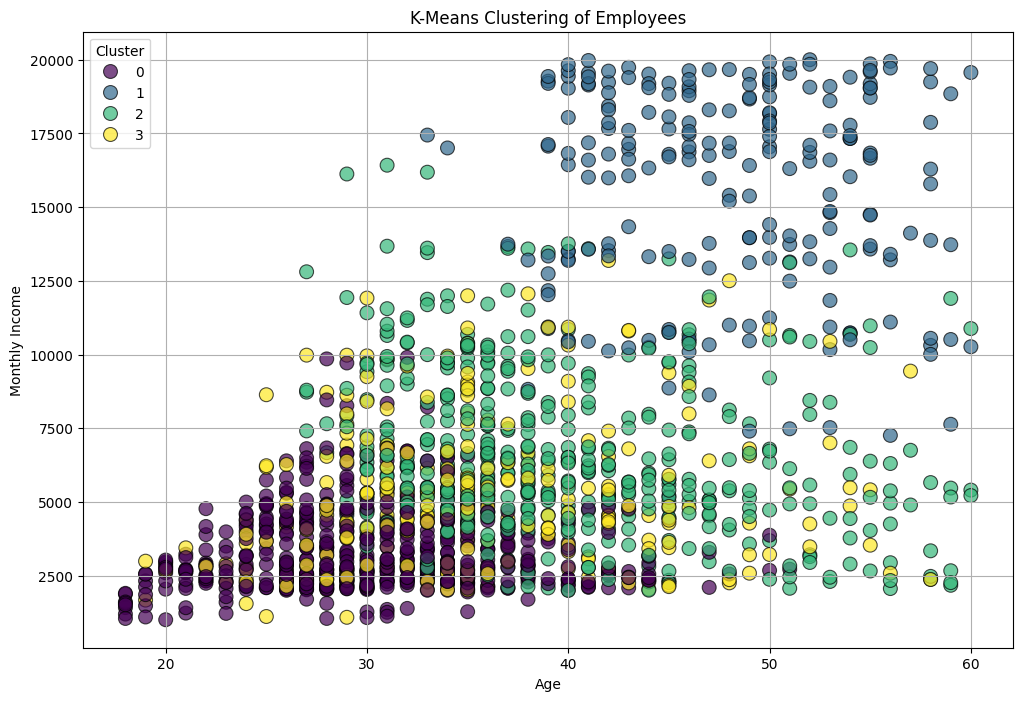

Cluster Centers (in original feature space):
Cluster 0:
  Age: 30.31
  Monthly Income: 3274.25
  Job Satisfaction: 2.59
  Total Working Years: 5.37
  Distance From Home: 5.54
  Years At Company: 3.66
  Job Level: 1.21

Cluster 1:
  Age: 47.89
  Monthly Income: 15635.91
  Job Satisfaction: 2.69
  Total Working Years: 25.85
  Distance From Home: 8.99
  Years At Company: 14.83
  Job Level: 4.12

Cluster 2:
  Age: 39.85
  Monthly Income: 6615.35
  Job Satisfaction: 2.90
  Total Working Years: 12.09
  Distance From Home: 5.53
  Years At Company: 7.65
  Job Level: 2.19

Cluster 3:
  Age: 35.38
  Monthly Income: 5071.33
  Job Satisfaction: 2.73
  Total Working Years: 9.28
  Distance From Home: 22.14
  Years At Company: 5.89
  Job Level: 1.79

Feature Distributions by Cluster:

Age:
  Cluster 0 - Mean: 30.30, Std Dev: 6.12
  Cluster 1 - Mean: 47.89, Std Dev: 6.00
  Cluster 2 - Mean: 39.87, Std Dev: 7.59
  Cluster 3 - Mean: 35.38, Std Dev: 7.65

MonthlyIncome:
  Cluster 0 - Mean: 3287.08, Std D

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Load the dataset
uploaded = files.upload()

# Extract the file name
file_path = list(uploaded.keys())[0]

# Read the CSV file
df = pd.read_csv(file_path)

# Select relevant employee-related factors for clustering
features = ['Age', 'MonthlyIncome', 'JobSatisfaction', 'TotalWorkingYears', 'DistanceFromHome', 'YearsAtCompany', 'JobLevel']

# Filter the dataset for these features
employee_data = df[features]

# Check for missing values and handle them (e.g., fill missing values with the median)
employee_data.fillna(employee_data.median(), inplace=True)

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(employee_data)

# Apply KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Plotting the clusters using Age and MonthlyIncome for visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='MonthlyIncome', hue='Cluster', palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title('K-Means Clustering of Employees')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Extract and print cluster centers in the scaled feature space
scaled_centers = kmeans.cluster_centers_

# Inverse transform the cluster centers to the original scale
original_centers = scaler.inverse_transform(scaled_centers)

print("Cluster Centers (in original feature space):")
for i, center in enumerate(original_centers):
    print(f"Cluster {i}:")
    print(f"  Age: {center[0]:.2f}")
    print(f"  Monthly Income: {center[1]:.2f}")
    print(f"  Job Satisfaction: {center[2]:.2f}")
    print(f"  Total Working Years: {center[3]:.2f}")
    print(f"  Distance From Home: {center[4]:.2f}")
    print(f"  Years At Company: {center[5]:.2f}")
    print(f"  Job Level: {center[6]:.2f}")
    print()

# Analyze and print feature distributions for each cluster
print("Feature Distributions by Cluster:")
for feature in features:
    print(f"\n{feature}:")
    for cluster in range(kmeans.n_clusters):
        cluster_feature_values = df[df['Cluster'] == cluster][feature]
        print(f"  Cluster {cluster} - Mean: {cluster_feature_values.mean():.2f}, Std Dev: {cluster_feature_values.std():.2f}")


Saving IBM_analysis.csv to IBM_analysis (3).csv


<ipython-input-6-0ba65a345e45>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_data.fillna(employee_data.median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change

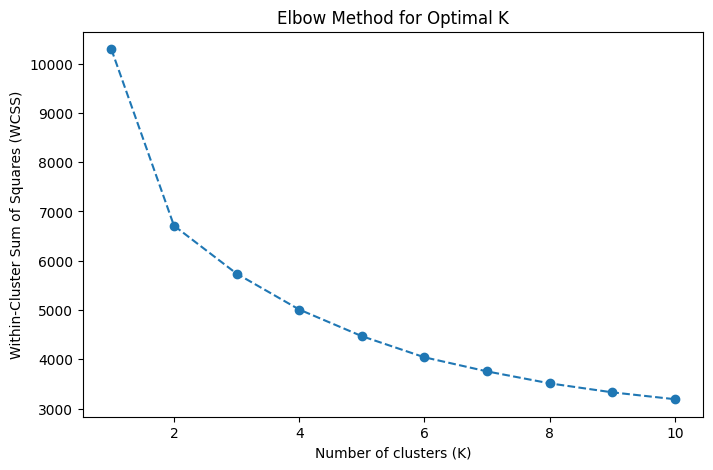

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import files

# Load the dataset
uploaded = files.upload()

# Extract the file name
file_path = list(uploaded.keys())[0]

# Read the CSV file
df = pd.read_csv(file_path)

# Select relevant employee-related factors for clustering
features = ['Age', 'MonthlyIncome', 'JobSatisfaction', 'TotalWorkingYears', 'DistanceFromHome', 'YearsAtCompany', 'JobLevel']

# Filter the dataset for these features
employee_data = df[features]

# Check for missing values and handle them (e.g., fill missing values with the median)
employee_data.fillna(employee_data.median(), inplace=True)

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(employee_data)

# List to store WCSS values for different K
wcss = []

# Try K from 1 to 10 and store WCSS for each
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()